# PHYS 105A:  Introduction to Scientific Computing

## Minimization or Maximization

In this assignment, we will modify the gradient descent method and use it for curve fitting.

In [1]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[ -8.34099845  -9.88844977  -9.83308228  -8.13941971 -10.4932626
  -9.99079953 -10.25764771  -8.42901087  -9.8360389   -8.10567361
  -7.76126663  -8.23487708  -8.57011904  -7.79005122  -7.22129604
  -5.18968514  -7.66471614  -7.71147926  -5.41662544  -4.73285631
  -4.75009274  -4.80599913  -6.10724961  -4.96482333  -5.70878111
  -5.84335165  -4.8866672   -5.21989231  -3.0990213   -4.46341315
  -7.57325695  -2.12954687  -3.26888183  -3.82651802  -3.28938007
  -2.32979385  -2.8526829

Text(0, 0.5, 'X')

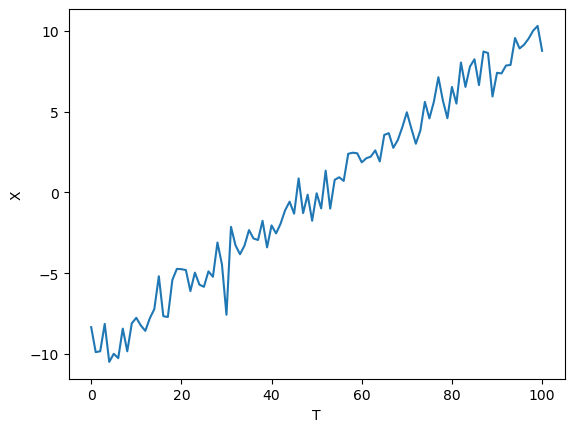

In [22]:
# Step 2. Create our model and add noise to it.

def boxcar(t):
    return -10 + 2 * t

N = 101
T = np.linspace(0, 10, N)
X = boxcar(T) + np.random.normal(size=N)
print(T)
print(X)
plt.plot(X)
plt.xlabel("T")
plt.ylabel("X")

In [47]:
# Step 3. Copy the minimization method that we implemented during the lecture
#
# In the lecture, we want to fit f(x) or f(x, y).  What variables we want to fit here?

def minimize(f, f_x, f_y, x, y, alpha, acc=1e-3, nmax=10000):
    l = np.array([x, y])
    for i in range(nmax):
        z   = f(x, y)
        z_x = f_x(x, y)
        z_y = f_y(x, y)
        if z_x*z_x + z_y*z_y <= acc * acc: # amplitude of derivative vector
            return l
        if i % 2 == 0:
            x -= alpha * z_x
        else:
            y -= alpha * z_y
        l = np.vstack((l, [x, y]))
            
    raise Exception("Too many iterations", l)
    
# What input do we need to perform curve fitting?

In [48]:
# Step 4. Define what we need for curve fitting
#
# Note that our minimization code only works for two variables.
# Which two variables do we want to use?
# 
# Hint: reduced chi-squared

def chisq(a,b):
    return np.sum(((a*T + b)-X) ** 2)

def chisq_a(a,b):
    return 2*np.sum(((a*T + b)-X)*T)
    
def chisq_b(a,b):
    return 2*np.sum(((a*T + b)-X))

In [50]:
# Step 5. Fit the curve

try:
    l1 = minimize(chisq, chisq_a, chisq_b, 1, -9, 0.1)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1)

Failed
[[ 1.00000000e+00 -9.00000000e+00]
 [ 5.75658094e+02 -9.00000000e+00]
 [ 5.75658094e+02 -5.79693080e+04]
 ...
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]]


/var/folders/kw/p6dm6cw517vcz0jm5nq2zznr0000gn/T/ipykernel_5998/666831864.py:11: RuntimeWarning: overflow encountered in scalar multiply
  if z_x*z_x + z_y*z_y <= acc * acc: # amplitude of derivative vector
/var/folders/kw/p6dm6cw517vcz0jm5nq2zznr0000gn/T/ipykernel_5998/1386210934.py:9: RuntimeWarning: overflow encountered in square
  return np.sum(((a*T + b)-X) ** 2)
/var/folders/kw/p6dm6cw517vcz0jm5nq2zznr0000gn/T/ipykernel_5998/1386210934.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum(((a*T + b)-X) ** 2)
/var/folders/kw/p6dm6cw517vcz0jm5nq2zznr0000gn/T/ipykernel_5998/1386210934.py:12: RuntimeWarning: invalid value encountered in multiply
  return 2*np.sum(((a*T + b)-X)*T)
/var/folders/kw/p6dm6cw517vcz0jm5nq2zznr0000gn/T/ipykernel_5998/1386210934.py:15: RuntimeWarning: invalid value encountered in multiply
  return 2*np.sum(((a*T + b)-X))


In [54]:
# Step 6. Adjust the initial guess and step size

try:
    l1 = minimize(chisq, chisq_a, chisq_b, 1, -8, 0.0001)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1)

[[  1.          -8.        ]
 [  1.47365809  -8.        ]
 [  1.47365809  -7.98787997]
 ...
 [  2.01258053 -10.09460561]
 [  2.01258055 -10.09460561]
 [  2.01258055 -10.09460571]]


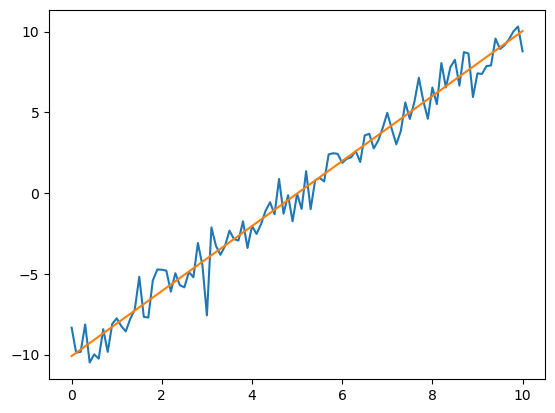

In [58]:
# Step 7. Overplot the data and the results

a, b = minimize(chisq, chisq_a, chisq_b, 1, -8, 0.0001)[-1]

plt.plot(T, X)
plt.plot(T, b + a * T)

## Question

We learned in the lecture, and tried it in this assignment that the step size is important.  If we choose too small a step size, the numerical scheme may be unstable and oscillate around the true solution forever.

Can we simply always choose a very small step size?  What are the advantage and disadvantage of it?

Describe a strategy to adjust the step size so that the minimizer is more robust.

Please write down your answer in the next cell.

#The advantage of taking a small step size would be that it converges to the true value, but it comes with a disadvantage of consuming too much computational power.

#By observing the rate of convergence of the value, we can adjust the step size accordingly.